In [1]:
#making all imports necessary 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.linear_model   import Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
#reading the data gathered from kaggle 
df = pd.read_csv('data/StudentPerformanceFactors.csv')

In [3]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
data_columns = df.columns
for col in data_columns: 
    print(col, ':', df[col].unique())


Hours_Studied : [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]
Attendance : [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
Parental_Involvement : ['Low' 'Medium' 'High']
Access_to_Resources : ['High' 'Medium' 'Low']
Extracurricular_Activities : ['No' 'Yes']
Sleep_Hours : [ 7  8  6 10  9  5  4]
Previous_Scores : [ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]
Motivation_Level : ['Low' 'Medium' 'High']
Internet_Access : ['Yes' 'No']
Tutoring_Sessions : [0 2 1 3 4 5 6 7 8]
Family_Income : ['Low' 'Medium' 'High']
Teacher_Quality : ['Medium' 'High' 'Low' nan]
School_Type : ['Public' 'Private']
Peer_Influence : ['Positive' 'Negative' 'Neu

In [7]:
#impute NaN values with the mode of the column
data_columns = df.columns
for col in data_columns: 
    if(df[col].isnull().sum() > 0): #if there are null values
        #impute them
        print(col)
        print("before:", col, ':', df[col].unique())
        df[col] = df[col].fillna(df[col].mode()[0])
        print("after:", col, ':', df[col].unique())
        print("-----------------")

df.info()

Teacher_Quality
before: Teacher_Quality : ['Medium' 'High' 'Low' nan]
after: Teacher_Quality : ['Medium' 'High' 'Low']
-----------------
Parental_Education_Level
before: Parental_Education_Level : ['High School' 'College' 'Postgraduate' nan]
after: Parental_Education_Level : ['High School' 'College' 'Postgraduate']
-----------------
Distance_from_Home
before: Distance_from_Home : ['Near' 'Moderate' 'Far' nan]
after: Distance_from_Home : ['Near' 'Moderate' 'Far']
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours

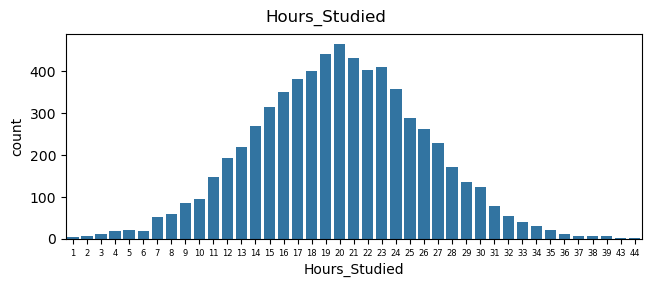

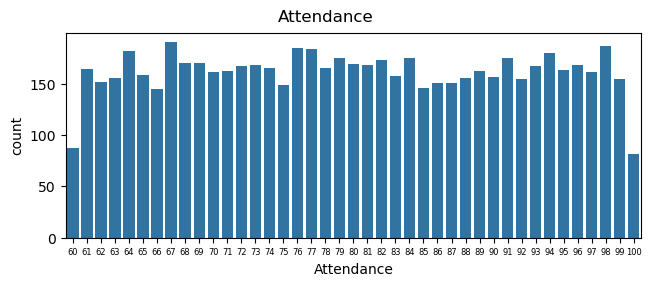

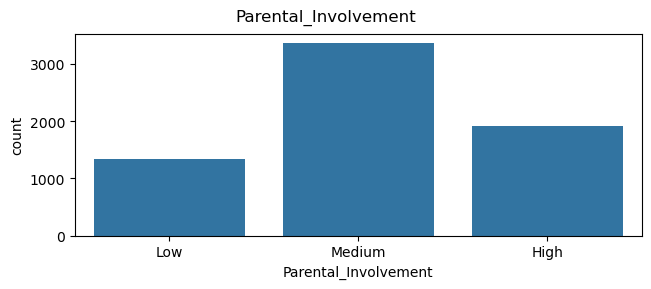

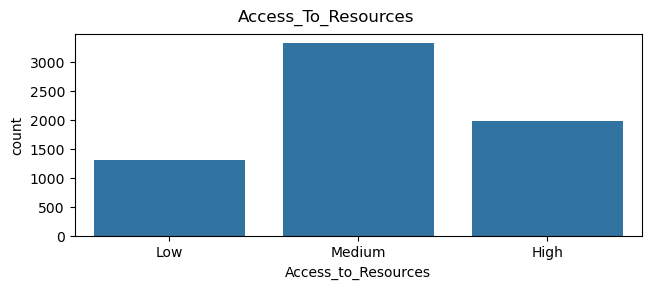

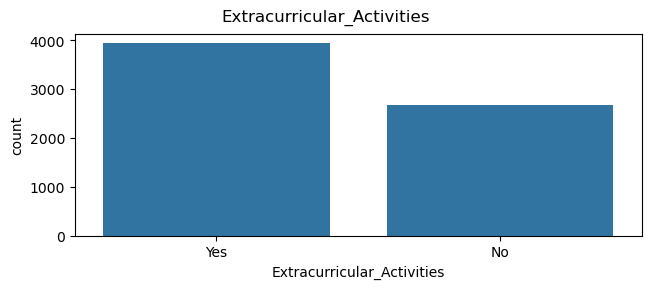

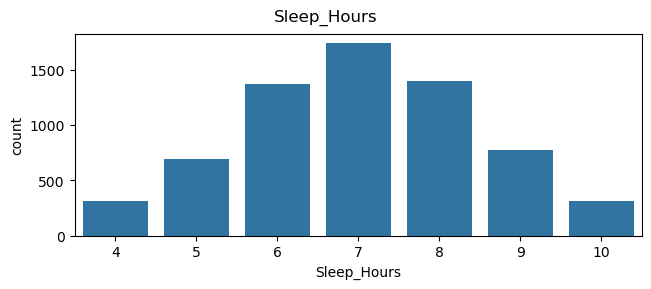

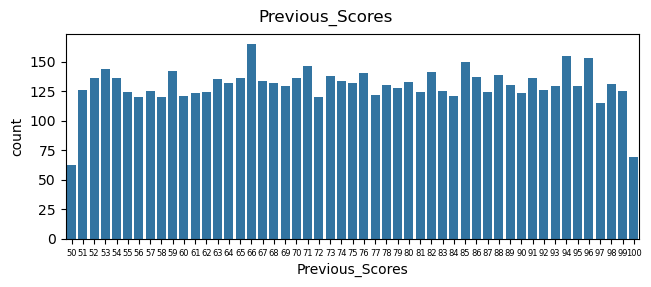

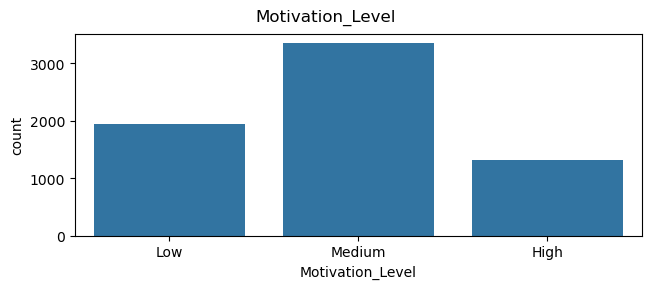

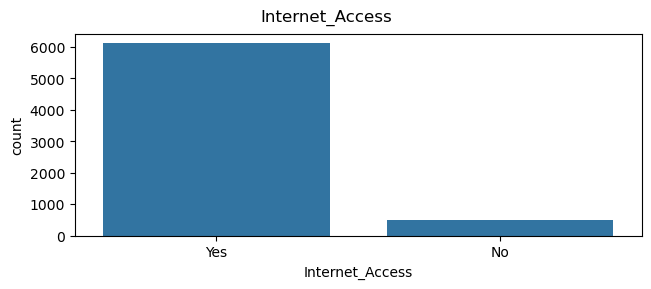

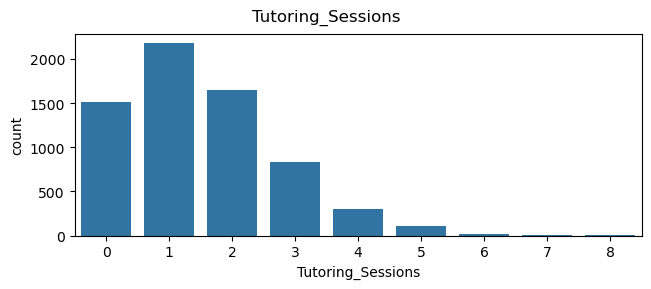

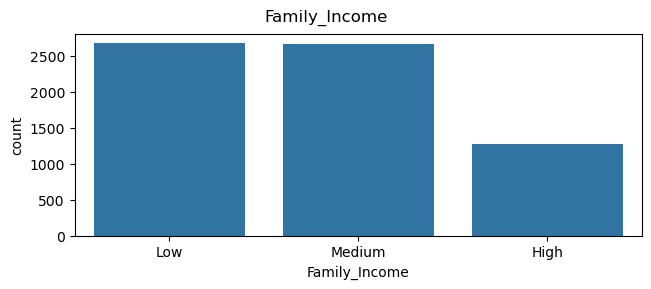

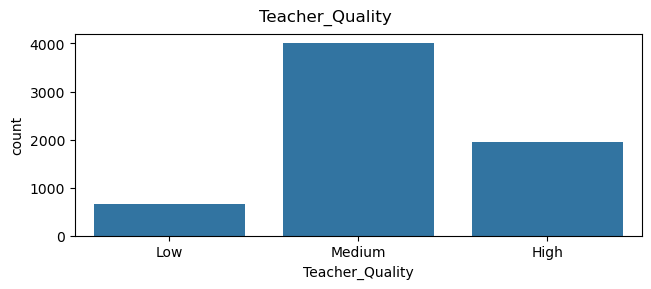

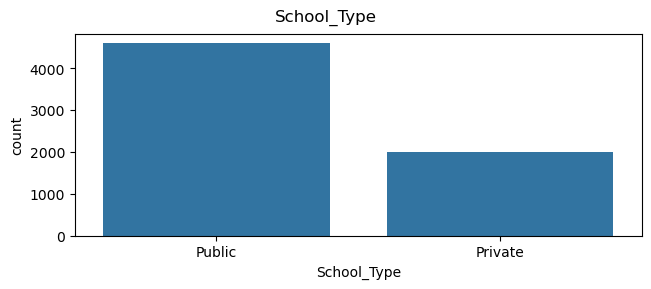

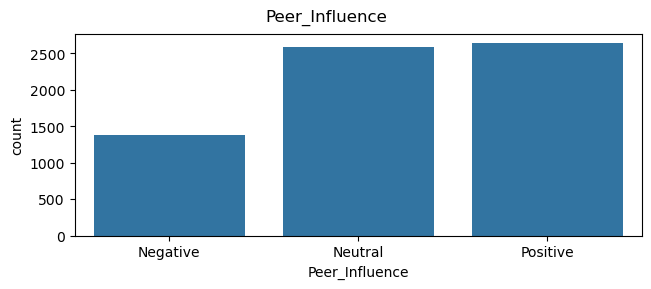

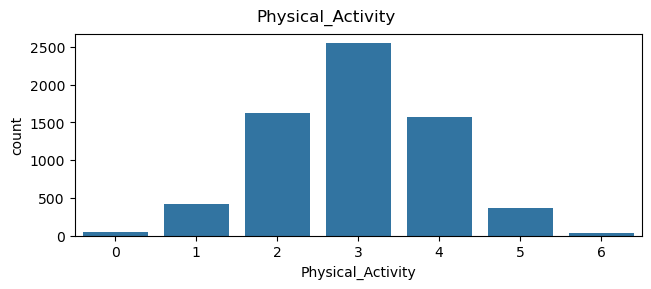

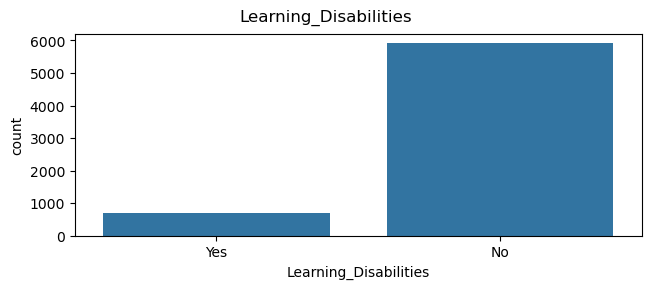

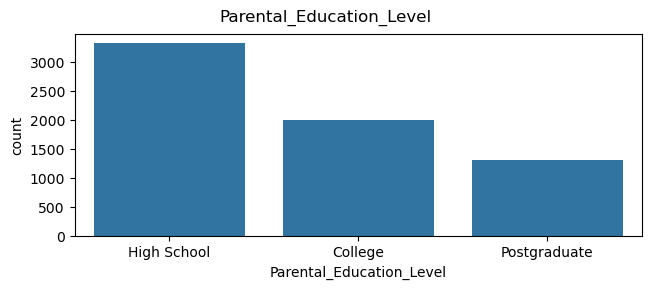

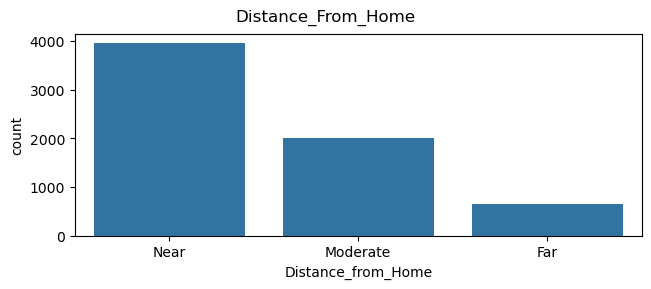

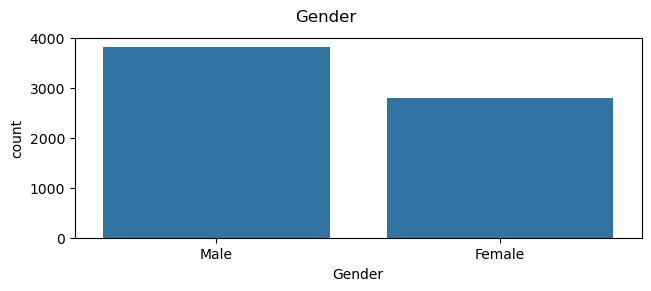

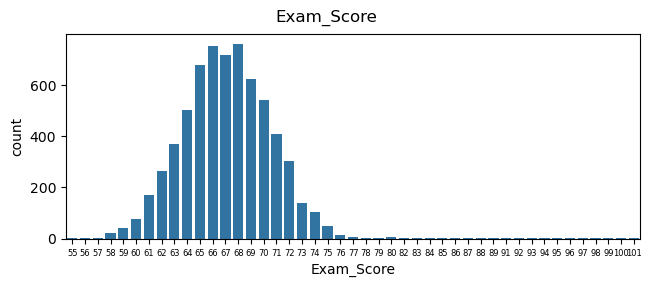

In [8]:
from matplotlib.gridspec import GridSpec

#histograms of each data variable
data_columns = df.columns
#for column in data_columns:
    #print(column, df[column].dtype)

cat_orders = [['Low', 'Medium', 'High'], 
                  ['Yes', 'No'],
                  ['Public', 'Private'],
                  ['Negative', 'Neutral', 'Positive'],
                  ['High School', 'College', 'Postgraduate'],
                  ['Near', 'Moderate', 'Far'],
                  ['Male', 'Female']]

for idx in range(len(data_columns)):
    x_value = data_columns[idx]
    t_value = data_columns[idx].title()
    
    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(2, 2, figure=fig)
    # create sub plots as grid
    ax = fig.add_subplot(gs[0, :])

    column = df[x_value]
    if(column.dtype == object):
        for cat_order in cat_orders:
            if(set(cat_order) == set(column.unique())):
                sns.countplot(df, x=x_value, order=cat_order) 
                break
    
    else: #col.dtype == int64
        if(column.max() - column.min() + 1 >= 40):
           plt.xticks(fontsize=6)
        sns.countplot(df, x=x_value)
    
    # depict illustration
    fig.suptitle(t_value)

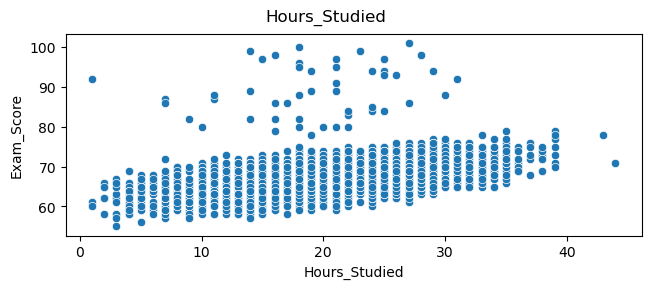

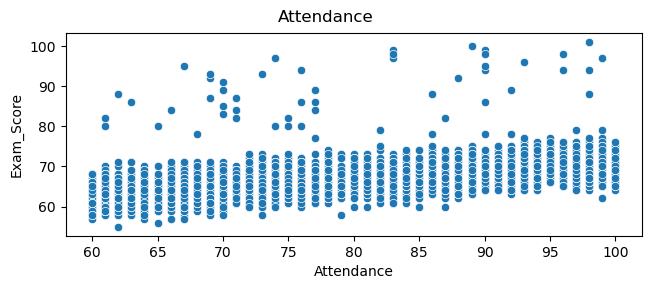

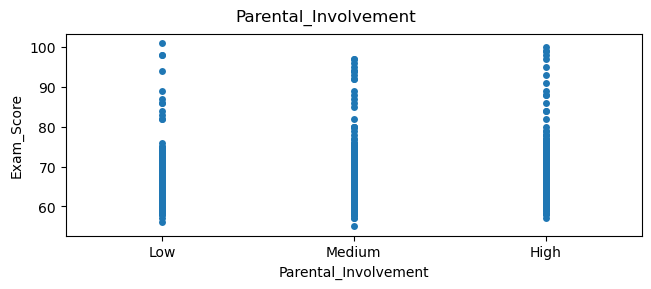

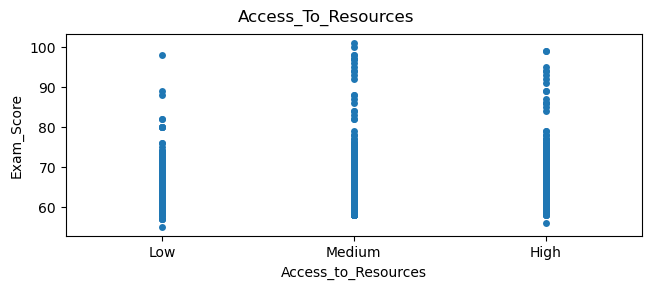

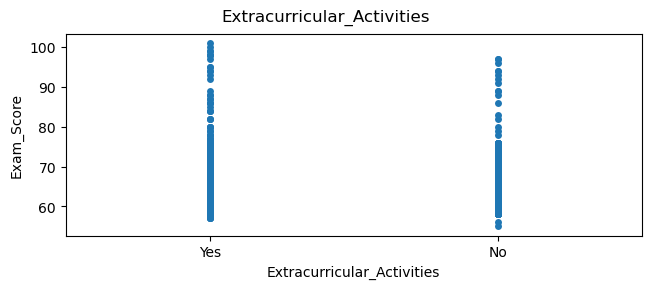

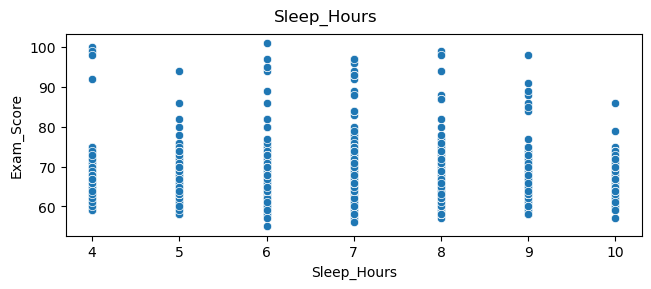

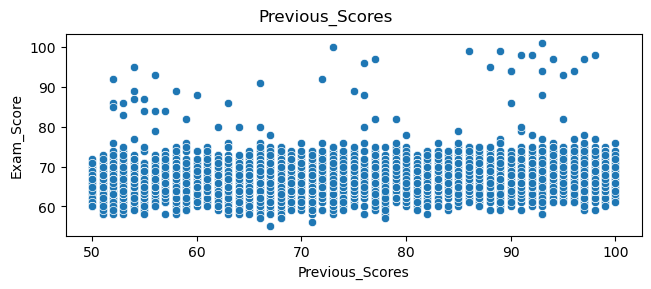

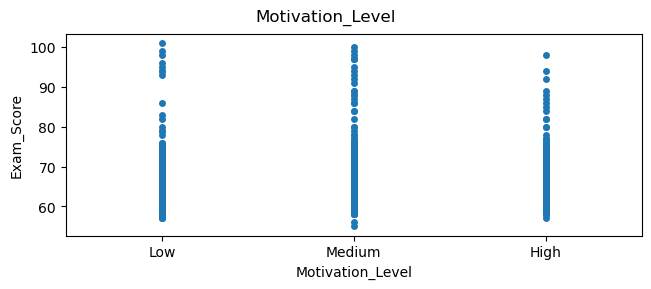

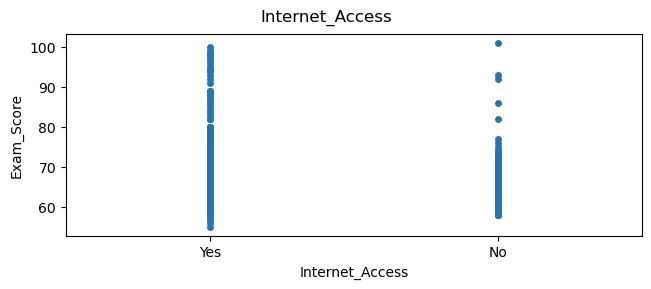

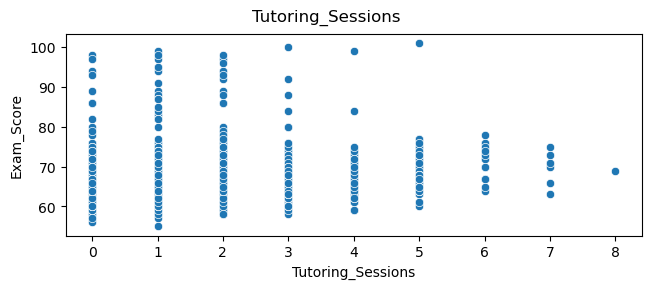

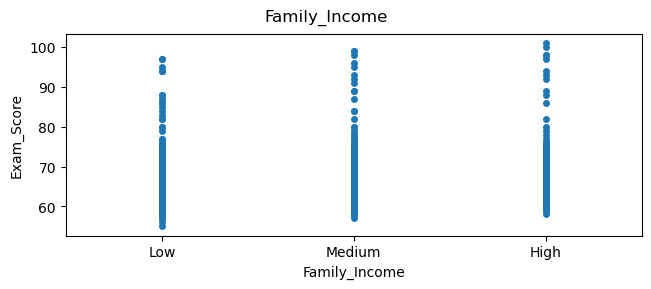

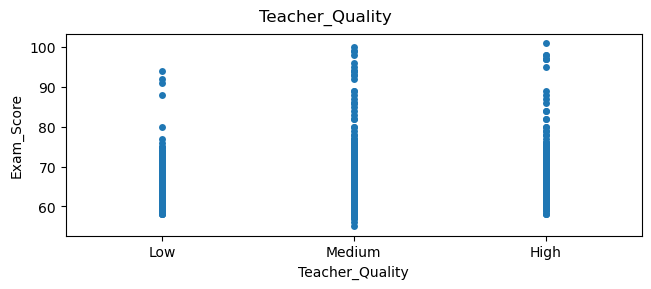

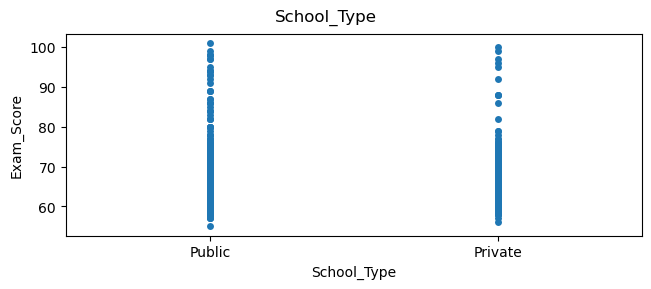

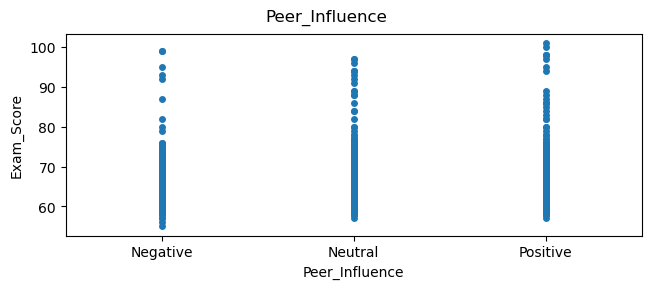

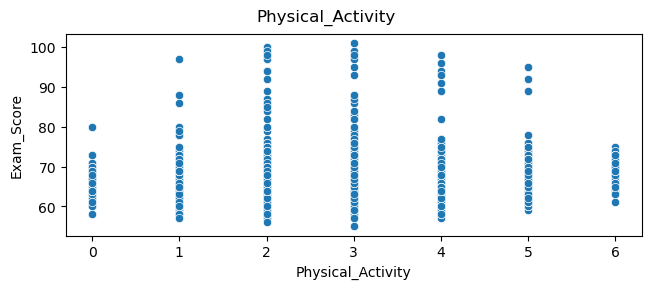

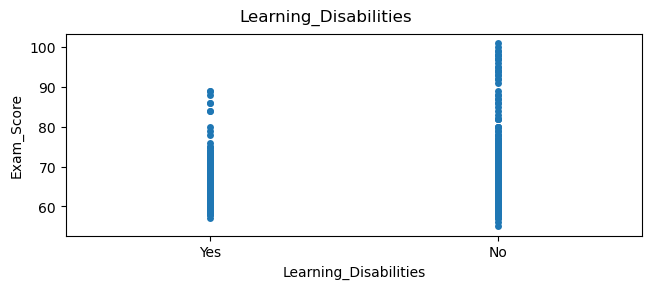

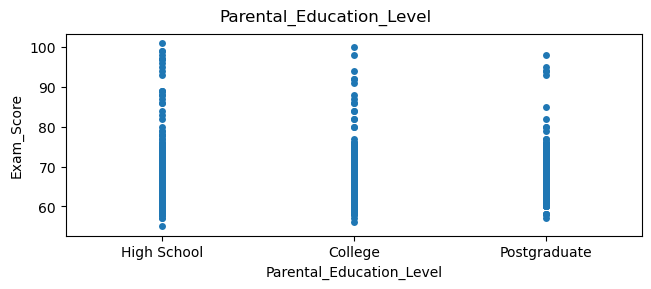

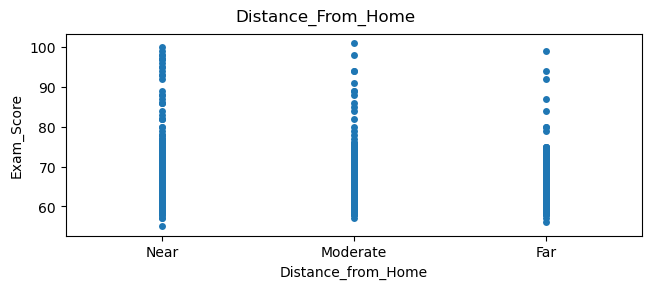

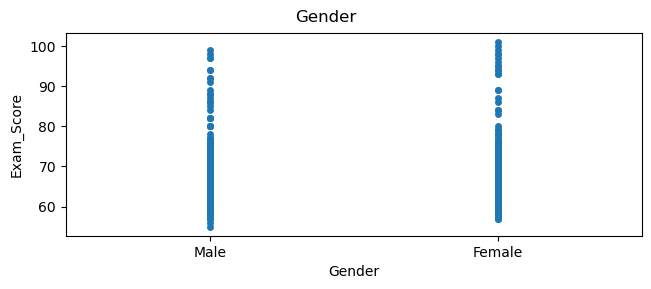

In [9]:
#histograms of each data variable
data_columns = df.columns

for idx in range(len(data_columns)-1):
    x_value = data_columns[idx]
    t_value = data_columns[idx].title()
    
    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(2, 2, figure=fig)
    # create sub plots as grid
    ax = fig.add_subplot(gs[0, :])
    
    column = df[x_value]
    if(column.dtype == object):
        for cat_order in cat_orders:
            if(set(cat_order) == set(column.unique())):
                sns.stripplot(data=df, x=x_value, y="Exam_Score", order=cat_order, jitter=False) 
                break
    else:
        sns.scatterplot(data=df,x=x_value, y="Exam_Score")       
    
    # depict illustration
    fig.suptitle(t_value)

In [10]:
from sklearn.preprocessing import OrdinalEncoder

num_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
cat_cols = [column for column in df.columns if column not in num_cols]

binary_cats = [column for column in cat_cols if df[column].nunique() == 2]
multival_cats = [column for column in cat_cols if column not in binary_cats]

#encode the categorical variables
encoded_df = df

if(['Yes', 'No'] in cat_orders): cat_orders.remove(['Yes', 'No'])
cat_orders.append(['No', 'Yes'])
for column in cat_cols:
    for cat_order in cat_orders:
            if(set(cat_order) == set(encoded_df[column].unique())):
                encoder = OrdinalEncoder(categories=[cat_order])
                encoded_df[column] = encoder.fit_transform(encoded_df[[column]])
                break
encoded_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.0,2.0,0.0,7,73,0.0,1.0,0,0.0,1.0,0.0,2.0,3,0.0,0.0,0.0,0.0,67
1,19,64,0.0,1.0,0.0,8,59,0.0,1.0,2,1.0,1.0,0.0,0.0,4,0.0,1.0,1.0,1.0,61
2,24,98,1.0,1.0,1.0,7,91,1.0,1.0,2,1.0,1.0,0.0,1.0,4,0.0,2.0,0.0,0.0,74
3,29,89,0.0,1.0,1.0,8,98,1.0,1.0,1,1.0,1.0,0.0,0.0,4,0.0,0.0,1.0,0.0,71
4,19,92,1.0,1.0,1.0,6,65,1.0,1.0,3,1.0,2.0,0.0,1.0,4,0.0,1.0,0.0,1.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2.0,1.0,0.0,7,76,1.0,1.0,1,2.0,1.0,0.0,2.0,2,0.0,0.0,0.0,1.0,68
6603,23,76,2.0,1.0,0.0,8,81,1.0,1.0,3,0.0,2.0,0.0,2.0,2,0.0,0.0,0.0,1.0,69
6604,20,90,1.0,0.0,1.0,6,65,0.0,1.0,3,0.0,1.0,0.0,0.0,2,0.0,2.0,0.0,1.0,68
6605,10,86,2.0,2.0,1.0,6,91,2.0,1.0,2,0.0,1.0,1.0,2.0,3,0.0,0.0,2.0,1.0,68


In [11]:
data_columns = encoded_df.columns
for col in data_columns: 
    print(col, ':', encoded_df[col].unique())
encoded_df.info()

Hours_Studied : [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]
Attendance : [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
Parental_Involvement : [0. 1. 2.]
Access_to_Resources : [2. 1. 0.]
Extracurricular_Activities : [0. 1.]
Sleep_Hours : [ 7  8  6 10  9  5  4]
Previous_Scores : [ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]
Motivation_Level : [0. 1. 2.]
Internet_Access : [1. 0.]
Tutoring_Sessions : [0 2 1 3 4 5 6 7 8]
Family_Income : [0. 1. 2.]
Teacher_Quality : [1. 2. 0.]
School_Type : [0. 1.]
Peer_Influence : [2. 0. 1.]
Physical_Activity : [3 4 2 1 5 0 6]
Learning_Disabilities : [0. 1.]
Parental_Education_Level : [0. 1. 2.]
Di

In [12]:
corr = encoded_df.corr()
sns.set(font_scale=1)
plt.figure(figsize=(100,100))
sns.heatmap(
    corr,
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

plt.show() 


In [13]:

corr = encoded_df.corr()

corr_with_target = corr['Exam_Score'].drop('Exam_Score')

corr_with_target = corr_with_target.sort_values(
    key=lambda x: x.abs(), 
    ascending=False
)

df_corr = (
    corr_with_target
      .reset_index()
      .rename(columns={'index':'Feature', 'Exam_Score':'Correlation'})
)

print(df_corr)

                       Feature  Correlation
0                   Attendance     0.581072
1                Hours_Studied     0.445455
2              Previous_Scores     0.175079
3          Access_to_Resources     0.169770
4         Parental_Involvement     0.157114
5            Tutoring_Sessions     0.156525
6     Parental_Education_Level     0.103817
7               Peer_Influence     0.100217
8                Family_Income     0.094555
9           Distance_from_Home    -0.088934
10            Motivation_Level     0.086937
11       Learning_Disabilities    -0.085066
12             Teacher_Quality     0.076684
13  Extracurricular_Activities     0.064382
14             Internet_Access     0.051475
15           Physical_Activity     0.027824
16                 Sleep_Hours    -0.017022
17                 School_Type     0.008844
18                      Gender     0.002032


In [14]:
predictors = ['Attendance',
              'Hours_Studied',
              'Previous_Scores',
              'Access_to_Resources',
              'Parental_Involvement',
              'Tutoring_Sessions',
              'Parental_Education_Level',
              'Peer_Influence'
             ]

target = 'Exam_Score'

In [15]:
#Linear regression
X = encoded_df[predictors]
y = encoded_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42
)

linModel = Ridge(alpha=1.0, solver="auto", fit_intercept=True)
linModel.fit(X_train, y_train)


Ridge()

In [16]:
linModel.score(X_train,y_train)

0.6654910227089901

In [17]:
linModel.score(X_test,y_test)

0.7343803215511906

In [18]:
#print the weights of each feature generated by the linear regression model 
coef_series = pd.Series(linModel.coef_, index=predictors)
print("Intercept:", linModel.intercept_)
print(coef_series)

Intercept: 37.91135051013967
Attendance                  0.198849
Hours_Studied               0.291992
Previous_Scores             0.048638
Access_to_Resources         1.026014
Parental_Involvement        1.000360
Tutoring_Sessions           0.513070
Parental_Education_Level    0.490222
Peer_Influence              0.522078
dtype: float64


In [19]:
#evaluation linear regression trainning 
train_predictions = linModel.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions) 
print("Training Set Evaluation:")
print("Mean Squared Error (MSE):", train_mse)
print("R squared Score:", train_r2)
print("Mean Absolute Error Score:", train_mae)

Training Set Evaluation:
Mean Squared Error (MSE): 5.200762546862998
R squared Score: 0.6654910227089901
Mean Absolute Error Score: 0.9265380246118096


In [20]:
#evaluation linear regression testing
test_predictions = linModel.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
print("\nTest Set Evaluation:")
print("Mean Squared Error (MSE):", test_mse)
print("R squared Score:", test_r2)
print("Mean Absolute Error Score:", test_mae)


Test Set Evaluation:
Mean Squared Error (MSE): 3.629104637184595
R squared Score: 0.7343803215511906
Mean Absolute Error Score: 0.8359343517514078


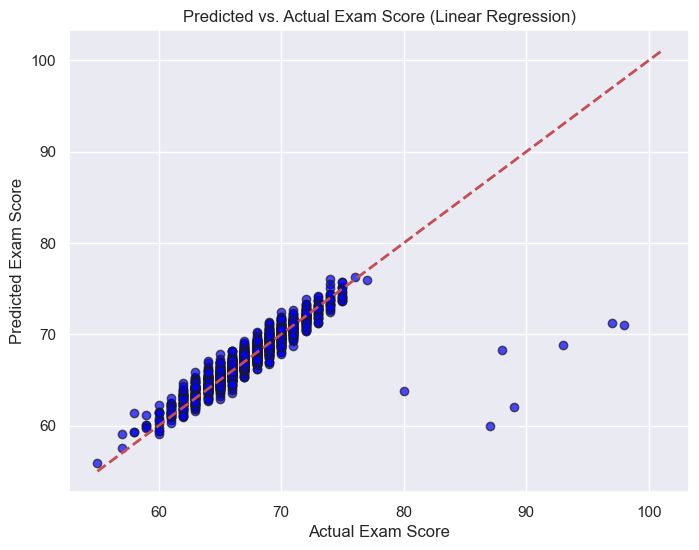

In [21]:
#graph of evaluation 
test_predictions = linModel.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Predicted vs. Actual Exam Score (Linear Regression)')
plt.show()

In [22]:
#Decision tree
X2 = encoded_df[predictors]
y2 = encoded_df[target]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.22, random_state=42)
regtreeModel = DecisionTreeRegressor(max_depth=  6, min_samples_leaf =  4, min_samples_split = 2)
regtreeModel.fit(X2_train, y2_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=4)

In [23]:
regtreeModel.score(X2_train,y2_train)

0.5872965064294691

In [24]:
regtreeModel.score(X2_test,y2_test)

0.5478243806522011

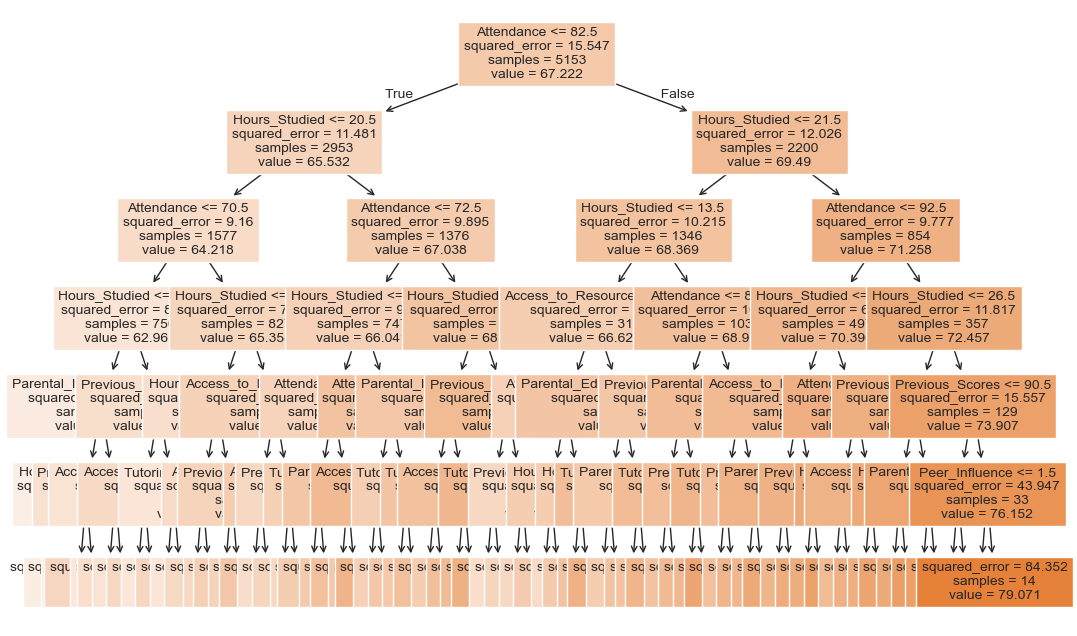

In [25]:
#decision tree visualization 
plt.figure(figsize=[12, 8])

p = tree.plot_tree(
    regtreeModel,
    feature_names=X2.columns,
    class_names=y2.unique(),
    filled=True,
    fontsize=10,
)

In [26]:
#evaluation regression tree training 
regtrain_predictions = regtreeModel.predict(X2_train)
train_mse = mean_squared_error(y2_train, regtrain_predictions)
train_r2 = r2_score(y2_train, regtrain_predictions)
train_mae = mean_absolute_error(y2_train, regtrain_predictions)

print("Training Set Evaluation:")
print("Mean Squared Error (MSE):", train_mse)
print("R squared Score:", train_r2)
print("Mean Absolute Error Score:", train_mae)

Training Set Evaluation:
Mean Squared Error (MSE): 6.416488100568582
R squared Score: 0.5872965064294691
Mean Absolute Error Score: 1.5063247527371755


In [27]:
#evaluation regression tree testing
regtest_predictions = regtreeModel.predict(X2_test)
test_mse = mean_squared_error(y2_test, regtest_predictions)
test_r2 = r2_score(y2_test, regtest_predictions)
test_mae = mean_absolute_error(y2_test, regtest_predictions)

print("\nTest Set Evaluation:")
print("Mean Squared Error (MSE):", test_mse)
print("R squared Score:", test_r2)
print("Mean Absolute Error Score:", test_mae)


Test Set Evaluation:
Mean Squared Error (MSE): 6.177978403483262
R squared Score: 0.5478243806522011
Mean Absolute Error Score: 1.5875877847671476


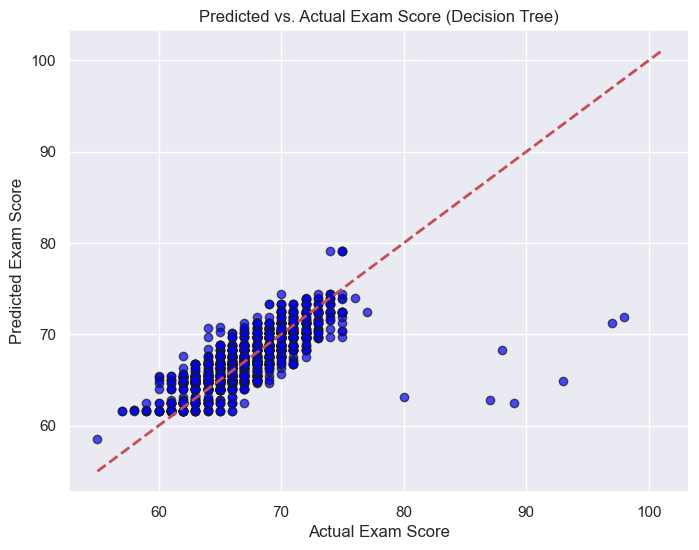

In [28]:
#graph of evaluation 
regtest_predictions = regtreeModel.predict(X2_test)
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, regtest_predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Predicted vs. Actual Exam Score (Decision Tree)')
plt.show()

In [29]:
#Random Forest
X3 = encoded_df[predictors]
y3 = encoded_df[target]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.22, random_state=42)

rf_reg = RandomForestRegressor(
    n_estimators=100, 
    random_state=42,
    n_jobs=-1
)
# bagging wrapper
bag_reg = BaggingRegressor(
    estimator=rf_reg,
    n_estimators=100,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

# fit & evaluate
bag_reg.fit(X3_train, y3_train)
y_pred = bag_reg.predict(X3_test)



In [30]:
#evaluation forest regression trainning 
foresttrain_predictions = bag_reg.predict(X3_train)
train_mse = mean_squared_error(y3_train, foresttrain_predictions)
train_r2 = r2_score(y3_train, foresttrain_predictions)
train_mae = mean_absolute_error(y3_train, foresttrain_predictions)

print("Training Set Evaluation:")
print("Mean Squared Error (MSE):", train_mse)
print("R squared Score:", train_r2)
print("Mean Absolute Error Score:", train_mae)

Training Set Evaluation:
Mean Squared Error (MSE): 2.121090124264703
R squared Score: 0.8635731430119189
Mean Absolute Error Score: 0.7024820374310554


In [31]:
#evaluation forest regression testing
forestregtest_predictions = bag_reg.predict(X3_test)
test_mse = mean_squared_error(y3_test, forestregtest_predictions)
test_r2 = r2_score(y3_test, forestregtest_predictions)
test_mae = mean_absolute_error(y3_test, forestregtest_predictions)

print("\nTest Set Evaluation:")
print("Mean Squared Error (MSE):", test_mse)
print("R squared Score:", test_r2)
print("Mean Absolute Error Score:", test_mae)


Test Set Evaluation:
Mean Squared Error (MSE): 4.466717400445227
R squared Score: 0.6730741716644488
Mean Absolute Error Score: 1.0972284367044096


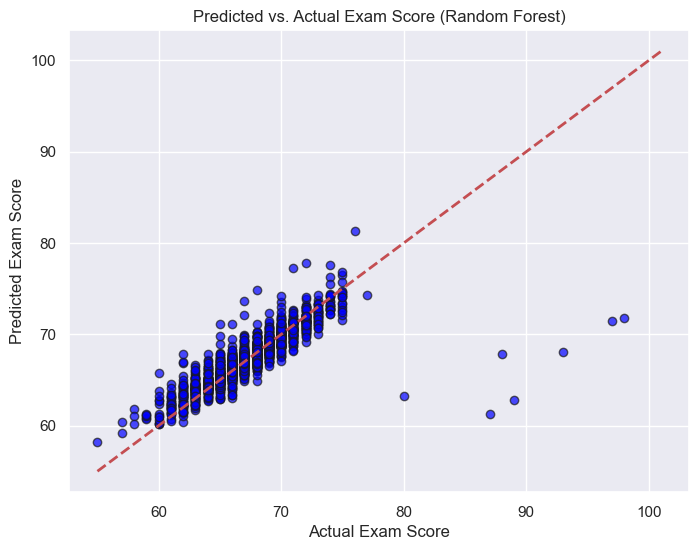

In [32]:
#graph of evaluation 
forestregtest_predictions = bag_reg.predict(X3_test)
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, forestregtest_predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Predicted vs. Actual Exam Score (Random Forest)')
plt.show()

In [41]:
#Random Forest optimization : 

# features & target
X = encoded_df[predictors]
y = encoded_df[target]

# sweep n_estimators from 10 to 100 (step 10)
param_range = np.arange(10, 110, 10)

# compute validation curve
train_scores, test_scores = validation_curve(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    X, y,
    param_name="n_estimators",
    param_range=param_range,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

# mean & std
train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
test_mean  = test_scores.mean(axis=1)
test_std   = test_scores.std(axis=1)

print('train_mean', train_mean) 
print('train_std', train_std) 
print('test_mean', test_mean) 
print('test_std', test_std) 


train_mean [0.92019113 0.93092575 0.93615529 0.93960431 0.94141499 0.94232091
 0.94289308 0.94310615 0.94357459 0.94405505]
train_std [0.00606776 0.00395404 0.00412922 0.00320021 0.00362495 0.00360308
 0.003268   0.00289765 0.00313291 0.00311165]
test_mean [0.56792963 0.58991902 0.59801229 0.60382279 0.60708605 0.60736331
 0.60804133 0.6087099  0.60906261 0.61007512]
test_std [0.04117438 0.05054127 0.04932271 0.05028545 0.05074674 0.05025099
 0.05067363 0.05029062 0.05029496 0.04973914]


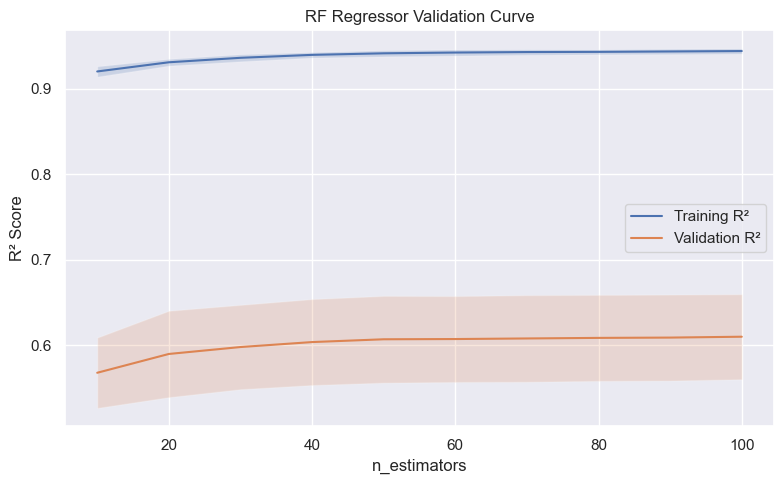

In [42]:
# plot with error bands
plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training R²")
plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.plot(param_range, test_mean, label="Validation R²")
plt.fill_between(param_range, test_mean-test_std, test_mean+test_std, alpha=0.2)

plt.title("RF Regressor Validation Curve")
plt.xlabel("n_estimators")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [35]:
# 1) Split data
X_train, X_test, y_train, y_test = train_test_split(
    encoded_df[predictors],
    encoded_df[target],
    test_size=0.22,
    random_state=42
)

# 2) Grid‐search for best hyper‐parameters
param_grid = {
    "max_depth":        [4, 5, 6, 7],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split":[2, 5, 10]
}
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print("Test  R²:", r2_score(y_test, y_pred))


# 3) Validation curve: max_depth vs. R²
param_range = [4, 5, 6, 7]
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(random_state=42),
    X_train, y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores,  axis=1)
test_std   = np.std(test_scores,  axis=1)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV R²: 0.49441024286861246
Test  R²: 0.5478243806522011


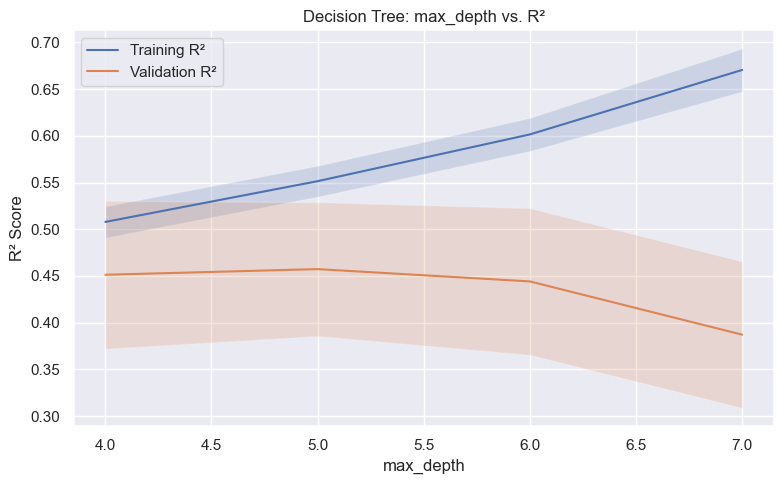

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label="Training R²")
plt.fill_between(param_range,
                 train_mean - train_std,
                 train_mean + train_std,
                 alpha=0.2)
plt.plot(param_range, test_mean, label="Validation R²")
plt.fill_between(param_range,
                 test_mean - test_std,
                 test_mean + test_std,
                 alpha=0.2)

plt.title("Decision Tree: max_depth vs. R²")
plt.xlabel("max_depth")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [37]:


# existing data split 
X = encoded_df[predictors]
y = encoded_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42
)

#  build a pipeline so scaling is always applied the same way 
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge",   Ridge())
])

# define the grid of hyper-parameters you want to search over 
param_grid = {
    "ridge__alpha":        [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    "ridge__solver":       ["auto", "svd", "cholesky", "lsqr", "sparse_cg"],
    "ridge__fit_intercept":[True, False]
}

# set up and run the grid search with 5-fold CV 
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

# inspect best hyper-parameters 
print("Best α:",               grid.best_params_["ridge__alpha"])
print("Best solver:",          grid.best_params_["ridge__solver"])
print("Best fit_intercept:",   grid.best_params_["ridge__fit_intercept"])
print("Best CV MSE:",          -grid.best_score_)

# evaluate on your held-out test set 
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test  MSE:", mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best α: 1.0
Best solver: auto
Best fit_intercept: True
Best CV MSE: 5.227994868460479
Test  MSE: 3.629144172615654
